In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from functools import reduce
from pylab import rcParams
import glob
import os

### Load Data

In [13]:
path_central_novice = r'C:\Users\imnku\Documents\Data Analysis\AMQ\CentralR-N'
all_files_central_novice = glob.glob(os.path.join(path_central_novice, "*.json"))

central_novice = pd.concat((pd.read_json(f) for f in all_files_central_novice), ignore_index=True)

path_east_novice = r'C:\Users\imnku\Documents\Data Analysis\AMQ\EastR-N'
all_files_east_novice = glob.glob(os.path.join(path_east_novice, "*.json"))

east_novice = pd.concat((pd.read_json(f) for f in all_files_east_novice), ignore_index=True)

novice = pd.concat(([central_novice, east_novice]), ignore_index=True)
novice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameMode       5310 non-null   object 
 1   name           5310 non-null   object 
 2   artist         5310 non-null   object 
 3   anime          5310 non-null   object 
 4   annId          5310 non-null   int64  
 5   songNumber     5310 non-null   int64  
 6   activePlayers  5310 non-null   int64  
 7   totalPlayers   5310 non-null   int64  
 8   type           5310 non-null   object 
 9   urls           5310 non-null   object 
 10  siteIds        5310 non-null   object 
 11  difficulty     5310 non-null   float64
 12  animeType      5310 non-null   object 
 13  animeScore     5310 non-null   float64
 14  vintage        5310 non-null   object 
 15  tags           5310 non-null   object 
 16  genre          5310 non-null   object 
 17  altAnswers     5310 non-null   object 
 18  startSam

### Drop less useful data

In [3]:
X = novice.drop(['annId', 'urls', 'siteIds', 'animeScore', 'altAnswers', 'selfAnswer', 'fromList', 'gameMode'], axis=1).copy()

In [4]:
X[89:90]

name          artist  \
89  THEME FROM LUPIN III  Peatmac Junior   

                                                anime  songNumber  \
89  {'english': 'Lupin III: Part II', 'romaji': 'L...          45   

    activePlayers  totalPlayers       type  difficulty animeType    vintage  \
89            225           242  Opening 2        43.7        TV  Fall 1977   

                                                 tags  \
89  [Police, Seinen, Male Protagonist, Anti-Hero, ...   

                                   genre  startSample  videoLength  \
89  [Action, Adventure, Comedy, Mystery]         23.0        79.41   

                                              players correct  
89  [{'name': '22xt', 'score': 21, 'correctGuesses...    True

### Find any null data

In [5]:
X.isnull().sum()

name             0
artist           0
anime            0
songNumber       0
activePlayers    0
totalPlayers     0
type             0
difficulty       0
animeType        0
vintage          0
tags             0
genre            0
startSample      4
videoLength      9
players          0
correct          0
dtype: int64

In [6]:
X[X['videoLength'].isnull()]

name  \
608              Brilliant Destiny   
990   Kaze wa Harukana Asu o Shiru   
2231              to the beginning   
2232                   ideal white   
2233                       GAMERS!   
2624      Ai no Medicine -Renewal-   
2846      Ai no Medicine -Renewal-   
4468                        Qunka!   
4841                    Reassembly   

                                          artist  \
608                                 Ayumi Murata   
990                                Akiko Shikata   
2231                                    Kalafina   
2232                               Mashiro Ayano   
2233  Hisako Kanemoto, Manaka Iwami, Rumi Ookubo   
2624                                Haruko Momoi   
2846                                Haruko Momoi   
4468                               Kana Hanazawa   
4841                           Tetsuya Takahashi   

                                                  anime  songNumber  \
608   {'english': 'How to Breed Kappas', 'romaji': '...          24   
990   {'english': 'Tales of Symphonia the Animation:...           1   
2231    {'english': 'Fate/Zero', 'romaji': 'Fate/Zero'}          27   
2232  {'english': 'Fate/stay night: Unlimited Blade ...          28   
2233        {'english': 'Gamers!', 'romaji': 'Gamers!'}          29   
2624  {'english': 'Nurse Witch Komugi', 'romaji': 'N...          15   
2846  {'english': 'Nurse Witch Komugi', 'romaji': 'N...          12   
4468        {'english': 'Teekyuu', 'romaji': 'Teekyuu'}          14   
4841            {'english': 'X-Men', 'romaji': 'X-Men'}          27   

      activePlayers  totalPlayers       type  difficulty animeType  \
608             230           235   Ending 1        11.3        TV   
990             227           228   Ending 4        18.3       OVA   
2231            128           134  Opening 1        75.7        TV   
2232            127           134  Opening 1        61.2        TV   
2233            128           134  Opening 1        70.7        TV   
2624            129           134  Opening 2        34.3       OVA   
2846            124           130  Opening 2        34.0       OVA   
4468            166           168  Opening 1        69.2        TV   
4841            147           155  Opening 1        25.4        TV   

          vintage                                               tags  \
608     Fall 2004                                      [Educational]   
990     Fall 2011                                            [Magic]   
2231  Spring 2012  [Magic, Swordplay, Tragedy, CGI, Gore, Battle ...   
2232    Fall 2014  [Magic, Swordplay, School, Super Power, Male P...   
2233  Summer 2017  [Parody, School, Slapstick, School Club, Otaku...   
2624  Summer 2002  [Magic, Parody, Otaku Culture, Female Protagon...   
2846  Summer 2002  [Magic, Parody, Otaku Culture, Female Protagon...   
4468  Summer 2015  [School, Primarily Female Cast, Cute Girls Doi...   
4841  Spring 2011  [Super Power, Ensemble Cast, Primarily Adult C...   

                                        genre  startSample  videoLength  \
608                                  [Comedy]          2.0          NaN   
990      [Action, Adventure, Comedy, Fantasy]          NaN          NaN   
2231   [Action, Drama, Fantasy, Supernatural]         36.0          NaN   
2232          [Action, Fantasy, Supernatural]         28.0          NaN   
2233  [Comedy, Drama, Romance, Slice of Life]         36.0          NaN   
2624           [Comedy, Mahou Shoujo, Sci-Fi]          9.0          NaN   
2846           [Comedy, Mahou Shoujo, Sci-Fi]          NaN          NaN   
4468                         [Comedy, Sports]          NaN          NaN   
4841                          [Action, Drama]          NaN          NaN   

                                                players correct  
608   [{'name': '49Leo', 'score': 4, 'correctGuesses...   False  
990   [{'name': '1KiiN', 'score': 0, 'correctGuesses...   False  
2231  [{'name': '11_', 'score': 15, 'correctGu

Looks like it corresponds to unloaded songs, we will drop these rows

In [7]:
X = X.dropna()
X.isnull().sum()

name             0
artist           0
anime            0
songNumber       0
activePlayers    0
totalPlayers     0
type             0
difficulty       0
animeType        0
vintage          0
tags             0
genre            0
startSample      0
videoLength      0
players          0
correct          0
dtype: int64

In [8]:
X['players'][0][0]

{'name': '1KiiN',
 'score': 1,
 'correctGuesses': 1,
 'correct': True,
 'answer': 'Serial Experiments Lain',
 'guessTime': 4455,
 'active': True,
 'position': 1,
 'positionSlot': 53}

In [9]:
for index, row in X.iterrows():
    count = 0
    for i in X['players'][index]:
        if i['correct']:
            count += 1
    X.loc[index, 'correctNumber'] = count
    

def find_gt(players):
    player = [x for x in players if x['name'] == 'TrueXC'][0]
    if 'guessTime' in player:
        gt = player['guessTime']
    else:
        gt = 20
    return gt

In [18]:
X['correctPercent'] = X['correctNumber']/X['activePlayers']
X['samplePercent'] = X['startSample']/X['videoLength']
X['type_noNumber'] = X['type'].str.split().str[0]
X['AiredDate'] = X['vintage'].replace({'Winter': '1', 'Spring': '4', 'Summer': '7', 'Fall': '10'}, regex=True)
X['AiredDate'] = pd.to_datetime(X['AiredDate'], format='%m %Y')
X.info()

NameError: name 'X' is not defined

In [16]:
novice.loc[novice['artist'] == 'Yui Horie']['urls'][157]

{'catbox': {'0': 'https://files.catbox.moe/2gezmr.mp3',
  '480': 'https://files.catbox.moe/rm6o8v.webm',
  '720': 'https://files.catbox.moe/n1bvoo.webm'}}

In [14]:
def find_mp3(urls):
    if '0' in urls['catbox']:
        url = urls['catbox']['0']
    else:
        url = None
    return url

def find_openingsmoe(urls):
    if 'openingsmoe' in urls:
        url = list(urls['openingsmoe'].values())[0]
    else:
        url = None
    return url
    
novice['mp3'] = novice['urls'].apply(find_mp3)
novice['openingsmoe'] = novice['urls'].apply(find_openingsmoe)

In [18]:
novice.loc[novice['artist'] == 'Yui Horie']['mp3']

157     https://files.catbox.moe/2gezmr.mp3
205     https://files.catbox.moe/zqv61z.mp3
669     https://files.catbox.moe/8aie0n.mp3
1255    https://files.catbox.moe/t0uc9d.mp3
1264    https://files.catbox.moe/3a6a5y.mp3
1351    https://files.catbox.moe/6flica.mp3
1644    https://files.catbox.moe/ehvm9i.mp3
1769    https://files.catbox.moe/08rdv0.mp3
1875    https://files.catbox.moe/nlakmy.mp3
1926    https://files.catbox.moe/nlakmy.mp3
1993    https://files.catbox.moe/nlakmy.mp3
2138    https://files.catbox.moe/7p651j.mp3
2239    https://files.catbox.moe/dm3adr.mp3
2275    https://files.catbox.moe/61qwcb.mp3
2407    https://files.catbox.moe/get2gp.mp3
2802    https://files.catbox.moe/g2dios.mp3
2851    https://files.catbox.moe/61qwcb.mp3
2939    https://files.catbox.moe/3a6a5y.mp3
2952    https://files.catbox.moe/5q2l4v.mp3
3463    https://files.catbox.moe/8aie0n.mp3
3536    https://files.catbox.moe/5q2l4v.mp3
3588    https://files.catbox.moe/2gezmr.mp3
3785    https://files.catbox.moe

In [19]:
novice.loc[novice['artist'] == 'ClariS']['mp3']

81      https://files.catbox.moe/8fpkiq.mp3
390     https://files.catbox.moe/8fpkiq.mp3
556     https://files.catbox.moe/vnnuc2.mp3
730     https://files.catbox.moe/wgzrs7.mp3
813     https://files.catbox.moe/2raaxw.mp3
984     https://files.catbox.moe/312u7g.mp3
1119    https://files.catbox.moe/ralocc.mp3
1141    https://files.catbox.moe/d9dx7t.mp3
1801    https://files.catbox.moe/ralocc.mp3
1826    https://files.catbox.moe/gy15p6.mp3
1947    https://files.catbox.moe/ralocc.mp3
2176    https://files.catbox.moe/jq20g1.mp3
2330    https://files.catbox.moe/z7wdww.mp3
2508    https://files.catbox.moe/vnnuc2.mp3
2535    https://files.catbox.moe/ybybe1.mp3
2577    https://files.catbox.moe/312u7g.mp3
2681    https://files.catbox.moe/4v2ngm.mp3
3283    https://files.catbox.moe/z7wdww.mp3
3649    https://files.catbox.moe/3jboau.mp3
3978    https://files.catbox.moe/0htomc.mp3
4035    https://files.catbox.moe/vnnuc2.mp3
4221    https://files.catbox.moe/2raaxw.mp3
4485    https://files.catbox.moe

In [20]:
novice['urls'][1]

{'catbox': {'0': 'https://files.catbox.moe/eippz0.mp3',
  '720': 'https://files.catbox.moe/2bhtae.webm'},
 'openingsmoe': {'720': 'https://openings.moe/video/AkatsukiNoYona-OP01-NCBD.webm'}}

In [21]:
import subprocess
import requests
from pathlib import Path


response = requests.get('https://openings.moe/video/SerialExperimentsLain-OP01-NCBD.webm')
filename = 'selop1.webm'
audio_file = 'selop1.mp3'
download_directory = Path('songs_videos')
media_path = download_directory.joinpath(filename)
audio_path = Path('songs_audio').joinpath(audio_file)
with open(download_directory.joinpath(filename), 'wb') as f:
    f.write(response.content)
ret_val = subprocess.run(['ffmpeg', '-i', str(media_path), '-b:a', '320k', str(audio_path)], capture_output=True)

In [64]:
def get_spectrogram(waveform):
    spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[..., tf.newaxis]
    return spectrogram

def process_openingsmoe(url, start_sample):
    response = requests.get(url)
    filename = url.split('/')[4]
    audio_file = filename.split('.')[0] + '.mp3'
    download_directory = Path('songs_videos')
    media_path = download_directory.joinpath(filename)
    audio_path = Path('songs_audio').joinpath(audio_file)
    with open(download_directory.joinpath(filename), 'wb') as f:
        f.write(response.content)
    ret_val = subprocess.run(['ffmpeg', '-i', str(media_path), '-b:a', '320k', str(audio_path)])
    audio_input = tfio.audio.AudioIOTensor(str(audio_path))
    start = int(start_sample*48000)
    end = int((start_sample + 20)*48000)
    audio_slice = audio_input[start:end]
    audio_tensor = tf.squeeze(audio_slice[:, -1])
    spec = get_spectrogram(audio_tensor)
    return spec

In [23]:
url = 'https://openings.moe/video/SerialExperimentsLain-OP01-NCBD.webm'

In [24]:
name = url.split('/')[4]
name.split('.')[0] + '.mp3'

'SerialExperimentsLain-OP01-NCBD.mp3'

In [25]:
import tensorflow as tf 
import tensorflow_io as tfio

In [26]:
sel = tfio.audio.AudioIOTensor(str(audio_path))

In [27]:
process_openingsmoe('https://openings.moe/video/AkatsukiNoYona-OP01-NCBD.webm')

In [45]:
from pathlib import Path
audio_path_2 = Path('songs_audio').joinpath('AkatsukiNoYona-OP01-NCBD.mp3')
tfio.audio.AudioIOTensor(str(audio_path_2))

<AudioIOTensor: shape=[4310322       2], dtype=<dtype: 'float32'>, rate=48000>

In [29]:
start = 43*48000
end = (43+20)*48000
slice = sel[start:end]
audio_tensor = tf.squeeze(slice[:, -1])
audio_tensor

<tf.Tensor: shape=(960000,), dtype=float32, numpy=
array([-0.01909788, -0.01370396, -0.02280417, ..., -0.07993342,
       -0.07854828, -0.07706415], dtype=float32)>

In [30]:
from IPython.display import Audio

Audio(audio_tensor.numpy(), rate=48000)

In [31]:
audio_tensor

<tf.Tensor: shape=(960000,), dtype=float32, numpy=
array([-0.01909788, -0.01370396, -0.02280417, ..., -0.07993342,
       -0.07854828, -0.07706415], dtype=float32)>

In [39]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

In [57]:
novice.head(20)

gameMode                                               name  \
0    Ranked                                              DUVET   
1    Ranked                                   Akatsuki no Yona   
2    Ranked                      Key -bring it on, my Destiny-   
3    Ranked                              Ishukan Communication   
4    Ranked                                  Naisho no Hanashi   
5    Ranked                                       ☆Lucky Star☆   
6    Ranked                              Kibun wa Megami Chick   
7    Ranked                                             Bolero   
8    Ranked                                  Nesshoku Starmine   
9    Ranked                                      Future Strike   
10   Ranked  Hen・Rin・Sham ~Hen da yo. Rinse no Ato ni Shamp...   
11   Ranked                                      Mega V (Volt)   
12   Ranked                                               Bury   
13   Ranked                                   Shadow and Truth   
14   Ranked                                            Overfly   
15   Ranked                                        Nee! Moomin   
16   Ranked                               Madoromi no Yakusoku   
17   Ranked                                      Shooting Star   
18   Ranked                             GATE II~Sekai o Koete~   
19   Ranked                                               Nazo   

                                   artist  \
0                                     BOA   
1                            Ryo Kunihiko   
2                      Lenny code fiction   
3                               Chorogons   
4                         Megumi Nakajima   
5                            Yumi Yoshino   
6                             Yoshie Hara   
7                  Freshman Wind Ensemble   
8                                 Roselia   
9                               Yui Ogura   
10                    Hen Semi no Minasan   
11                                 Yusuke   
12                   Pay money To my Pain   
13                          ONE III NOTES   
14                            Luna Haruna   
15                         Toshiko Fujita   
16                Satomi Sato & Ai Kayano   
17                                 KOTOKO   
18  Kishida Kyoudan &THE Akeboshi Rockets   
19                           Miho Komatsu   

                                                anime  annId  songNumber  \
0   {'english': 'Serial Experiments Lain', 'romaji...    166           1   
1   {'english': 'Yona of the Dawn', 'romaji': 'Aka...  16154           2   
2   {'english': 'D.Gray-man Hallow', 'romaji': 'D....  18193           3   
3   {'english': 'Miss Kobayashi's Dragon Maid', 'r...  18807           4   
4   {'english': 'Tamayura: More Aggressive', 'roma...  15126           5   
5   {'english': 'Hamster Club', 'romaji': 'Hamster...  22276           6   
6   {'english': 'Ochamegami Monogatari: Korokoro P...   1680           7   
7   {'english': 'Sound! Euphonium: The Movie - Our...  21102           8   
8   {'english': 'BanG Dream! Asonjatta!', 'romaji'...  22411           9   
9   {'english': 'ViVid Strike!', 'romaji': 'ViVid ...  18664          10   
10  {'english': 'Abnormal Physiology Seminar', 'ro...  11370          11   
11  {'english': 'Pokémon the Movie: Diancie and th...  15765          12   
12      {'english': 'One Outs', 'romaji': 'One Outs'}  10199          13   
13  {'english': 'ACCA: 13-Territory Inspection Dep...  18461          14   
14  {'english': 'Sword Art Online', 'romaji': 'Swo...  13858          15   
15          {'english': 'Moomin', 'romaji': 'Muumin'}    431          16   
16          {'english': 'Hyouka', 'romaji': 'Hyouka'}  13817          17   
17  {'english': 'Please Teacher!', 'romaji': 'Oneg...    386          18   
18  {'english': 'Gate', 'romaji': 'Gate: Jieitai K...  17831          19   
19  {'english': 'Detective Conan', 'romaji': 'Meit...    454          20   

    activePlayers  totalPlayers         type  \
0             211        

In [51]:
koba = process_openingsmoe(novice['openingsmoe'][3], novice['startSample'][3])

In [52]:
Audio(koba.numpy(), rate=48000)

In [58]:
vivid = process_openingsmoe(novice['openingsmoe'][9], novice['startSample'][9])
Audio(vivid.numpy(), rate=48000)

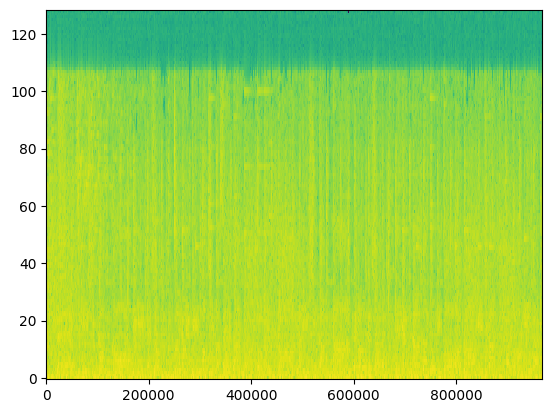

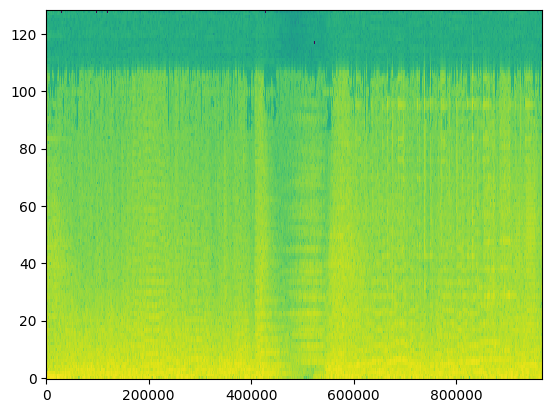

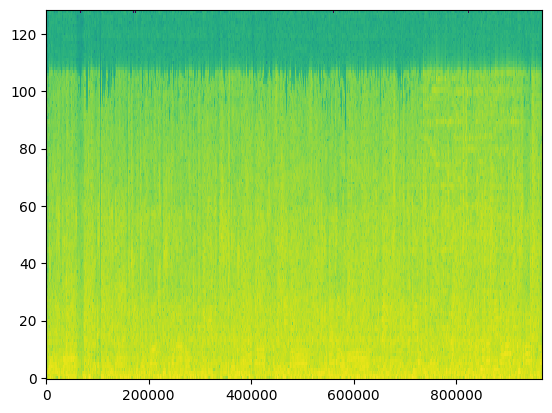

In [59]:
spec = get_spectrogram(koba)
f, ax = plt.subplots(1, 1)
plot_spectrogram(spec.numpy(), ax)
plt.show()

spec = get_spectrogram(audio_tensor)
f, ax = plt.subplots(1, 1)
plot_spectrogram(spec.numpy(), ax)
plt.show()

spec = get_spectrogram(vivid)
f, ax = plt.subplots(1, 1)
plot_spectrogram(spec.numpy(), ax)
plt.show()


In [62]:
novice.loc[novice['openingsmoe'].notna()]['artist'].value_counts()

Yui Horie                        17
fripSide                         15
ZAQ                              14
nano.RIPE                        13
Haruka Tomatsu                   12
                                 ..
Pay money To my Pain              1
Momotsuki Gakuen 1-nen C-gumi     1
Kaori Sadohara                    1
Rina Satou to Asuka Oogame        1
Group Tamashii                    1
Name: artist, Length: 377, dtype: int64

In [66]:
data_all = novice.loc[novice['openingsmoe'].notna()].reset_index(drop=True)

In [70]:
data_all = data_all.drop(['gameMode',
               'name', 
               'anime',
               'annId',
               'songNumber',
               'activePlayers',
               'totalPlayers',
               'type',
               'urls',
               'genre',
               'altAnswers',
               'videoLength',
               'players',
               'fromList',
               'correct',
               'selfAnswer',
               'mp3', 'siteIds', 'difficulty', 'animeType', 'animeScore', 'vintage', 'tags'], axis=1)

In [71]:
data_all.columns

Index(['artist', 'startSample', 'openingsmoe'], dtype='object')

In [77]:
data_all = data_all.loc[(data_all['artist'] == 'Yui Horie') | (data_all['artist'] == 'fripSide')].reset_index(drop=True)

In [85]:
list_spec = []
for i in range(data_all.shape[0]):
    spec = process_openingsmoe(data_all['openingsmoe'][i], data_all['startSample'][i])
    list_spec.append(spec)

data_all['spec'] = list_spec

In [183]:
for i in range(32):
    data_all['spec'][i] = list_spec[i].numpy()

C:\Users\imnku\AppData\Local\Temp\ipykernel_12856\1972188075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all['spec'][i] = list_spec[i].numpy()


In [176]:
data_all['spec'] = list_spec

In [177]:
data_all.iloc[0]

artist                                                  fripSide
startSample                                                  6.0
openingsmoe    https://openings.moe/video/BlackBullet-OP01BD-...
spec           (((tf.Tensor(6.1875305, shape=(), dtype=float3...
Name: 0, dtype: object

In [184]:
X = data_all['spec']
y = data_all['artist'].map({'fripSide':0, 'Yui Horie': 1})

In [185]:
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=1)

input_shape = X[0].shape
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Resizing(32, 32),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1),
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_10 (Resizing)      (None, 32, 32, 1)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 12544)             0         
                                                     

In [195]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [196]:
EPOCHS = 10
X_train = np.array([np.array(val) for val in X_train])
X_valid = np.array([np.array(val) for val in X_valid])
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6760 - accuracy: 0.4583 - val_loss: 0.6371 - val_accuracy: 0.6250
Epoch 2/10
1/1 [==============================] - 0s 212ms/step - loss: 0.6867 - accuracy: 0.5417 - val_loss: 0.5586 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 150ms/step - loss: 0.5067 - accuracy: 0.7500 - val_loss: 0.5071 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 138ms/step - loss: 0.3797 - accuracy: 0.8750 - val_loss: 0.4452 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 164ms/step - loss: 0.3122 - accuracy: 0.9167 - val_loss: 0.4186 - val_accuracy: 0.8750
Epoch 6/10
1/1 [==============================] - 0s 157ms/step - loss: 0.3310 - accuracy: 0.9583 - val_loss: 0.3651 - val_accuracy: 0.8750
Epoch 7/10
1/1 [==============================] - 0s 146ms/step - loss: 0.2065 - accuracy: 0.9167 - val_loss: 0.3121 - val_accuracy: 0.8750
Epoch 8/10
1/1 [=======

In [114]:
[print(i.shape, i.dtype) for i in model.inputs]
print('q')
[print(o.shape, o.dtype) for o in model.outputs]
print('q')
[print(l.name, l.input_shape, l.dtype) for l in model.layers]
1

(None, 7499, 129, 1) <dtype: 'float32'>
q
(None, 2) <dtype: 'float32'>
q
resizing_1 (None, 7499, 129, 1) float32
conv2d_2 (None, 32, 32, 1) float32
conv2d_3 (None, 30, 30, 32) float32
max_pooling2d_1 (None, 28, 28, 64) float32
dropout_2 (None, 14, 14, 64) float32
flatten_1 (None, 14, 14, 64) float32
dense_2 (None, 12544) float32
dropout_3 (None, 128) float32
dense_3 (None, 128) float32


1

In [173]:
data = X[0]
data_np = np.asarray(data, np.float32)
data_tf = tf.convert_to_tensor(data_np, np.float32)

In [193]:
X_train[0]

array([[[4.8601708e+00],
        [8.6483402e+00],
        [8.1635485e+00],
        ...,
        [2.1977228e-05],
        [2.2714923e-05],
        [1.2397766e-05]],

       [[5.8955126e+00],
        [2.1061037e+00],
        [2.3999145e+00],
        ...,
        [1.8335090e-06],
        [2.0578454e-05],
        [1.9073486e-05]],

       [[4.4340281e+00],
        [6.1755624e+00],
        [6.4391918e+00],
        ...,
        [2.8349325e-05],
        [3.9956456e-05],
        [3.0040741e-05]],

       ...,

       [[4.7657909e+00],
        [3.8187635e+00],
        [3.0979469e+00],
        ...,
        [1.1623975e-05],
        [2.6495627e-05],
        [2.1457672e-05]],

       [[1.1177633e+01],
        [9.9454269e+00],
        [4.3958173e+00],
        ...,
        [3.1590462e-06],
        [9.3569797e-06],
        [2.3841858e-05]],

       [[6.3045273e+00],
        [4.4286723e+00],
        [1.5216352e+00],
        ...,
        [6.8710997e-06],
        [2.0597097e-05],
        [3.1232834e-05]]

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb2 = MultiLabelBinarizer()
s = novice['genre']
dummy = pd.DataFrame(mlb2.fit_transform(s), columns=mlb2.classes_, index=novice.index)
novice = pd.concat([novice, dummy], axis=1)

novice = novice.drop(['tags', 'genre'], axis=1)

genres = novice.loc[novice['openingsmoe'].notna()][mlb2.classes_].sum().sort_values(ascending=False)
genres_c = novice.loc[novice['correct'] == True][mlb2.classes_].sum()
g_perc = genres_c/genres *100
genres = pd.concat([genres, g_perc], axis=1)
genres.columns = ['Count', 'Guess rate']
genres = genres.sort_values(by='Guess rate', ascending=False)

In [16]:
genres

Count   Guess rate
Music             24  1050.000000
Mahou Shoujo      20   750.000000
Sports            47   461.702128
Horror            52   378.846154
Slice of Life    252   371.428571
Adventure        193   363.212435
Mecha             59   349.152542
Drama            320   335.937500
Comedy           530   322.830189
Fantasy          296   312.500000
Mystery          125   310.400000
Sci-Fi           208   303.365385
Psychological    145   280.000000
Thriller          53   273.584906
Action           465   267.311828
Romance          319   265.517241
Supernatural     279   257.706093
Ecchi            172   203.488372

In [19]:
novice['type_noNumber'] = novice['type'].str.split().str[0]
novice.loc[novice['openingsmoe'].notna()]['type_noNumber'].value_counts()

Opening    813
Ending     195
Insert       1
Name: type_noNumber, dtype: int64

In [21]:
novice.type_noNumber.value_counts()

Opening    3186
Ending     1180
Insert      944
Name: type_noNumber, dtype: int64

In [24]:
novice.name.value_counts()

Moete Hero                      13
Gegege no Kitarou               12
Tetsuwan Atom                   12
Believe                         12
battlecry                       11
                                ..
COOLISH WALK                     1
Gasshin! God Gravion!!!          1
Home Sweet Home!                 1
Bokura wa Tabi no Ongaku-tai     1
Fast Forward                     1
Name: name, Length: 3235, dtype: int64